Tässä esseessä tutkitaan kahta eri algoritmia, jotka laskee kahden luvun suurimman yhteisen tekijän, ja keskitytään vertailemaan niiden aikavaativuutta keskenään.

# Algoritmit

#### Algoritmi 1
Ensimmäisessä algoritmissa vähennellään lukuja toisistaan vuorotellen niin, että luvut pysyvät ei-negatiivisina. Tällä tavoin päästään pienimpään positiiviseen lukuun, joka saadaan alkuperäisten lukujen $a$ ja $b$ lineaarikombinaationa. Tämä luku on lukujen $a$ ja $b$ suurin yhteinen tekijä. Tämä algoritmi käyttää vain vertailuja ja vähennyslaskuja, jotka voidaan suorittaa $O(max\{n, m\})$ bittioperaatiolla, missä $n$ ja $m$ ovat lukujen binääriesityksien pituudet.

In [1]:
def syt(a, b):
    kierros = 0
    while a > 0 and b > 0:
        if a > b:
            a = a - b
        else:
            b = b - a
        kierros += 1
    return((a, kierros))

Algoritmissa pidetään kirjaa tarvittavien kierrosten määrästä. Jokaisella kierroksella tehdään kolme vertailua ja yksi vähennyslasku, eli yksi kierros on $O(n)$.

#### Algoritmi 2 (Eukleideen algoritmi)
Toinen algoritmi on tavallinen Eukleideen algoritmi, jossa käytetään jakojäännöstä, jonka laskeminen onnistuu $O(n^2)$ bittioperaatiolla.

In [2]:
def eukl(a, b):
    q = max(a, b)
    r = min(a, b)
    kierros = 0
    while r != 0:
        q, r = r, q % r
        kierros += 1
    return (q, kierros)

Myöhemmin havaitaan, että Eukleideen algoritmissa tarvitaan kierroksia korkeintaan $O(n)$ kappaletta. Luentomonisteessa huomautetaan, että joissain tapauksissa vähemmällä ei selviä, esimerkiksi peräkkäisten Fibonaccin lukujen sytin laskemisessa.

# Aikavaativuus

On vähän huolimatonta vertailla algoritmeja aritmeettisten operaatioiden suhteen, kun algoritmien käyttämät operaatiot ovat keskenään eri kompleksisuusluokkaa, mutta huomataan, että tässä tapauksessa sillä ei ole merkitystä. Vertaillaan algoritmien vaatimien kierrosten lukumäärää:

In [3]:
def vertailu(a, b):
    print("Algoritmi 1: syöte: a = %d, b = %d" % (a,b))
    print("             syt: %d, kierroksia: %d \n" % (syt(a,b)))

    print("Algoritmi 2: syöte: a = %d, b = %d" % (a,b))
    print("             syt: %d, kierroksia: %d \n \n" % (eukl(a,b)))

In [4]:
a = 233
b = 144
vertailu(a,b)

b = 233
vertailu(a,b)

b = 1
vertailu(a,b)

Algoritmi 1: syöte: a = 233, b = 144
             syt: 1, kierroksia: 12 

Algoritmi 2: syöte: a = 233, b = 144
             syt: 1, kierroksia: 11 
 

Algoritmi 1: syöte: a = 233, b = 233
             syt: 233, kierroksia: 1 

Algoritmi 2: syöte: a = 233, b = 233
             syt: 233, kierroksia: 1 
 

Algoritmi 1: syöte: a = 233, b = 1
             syt: 1, kierroksia: 233 

Algoritmi 2: syöte: a = 233, b = 1
             syt: 1, kierroksia: 1 
 



Peräkkäisten Fibonaccin lukujen sytin laskemisessa algoritmit suoriutuvat suunnilleen yhtä monessa kierroksessa, samoin luvun sytin itsensä kanssa, mutta $syt(a, 1)$ laskemiseen algoritmilla 1 menee $a$ kierrosta, eli $O(2^n)$ laskutoimitusta ja vertailua! Laskutoimitukset ovat tosin erityisen edullisia: ykkösen vähetäminen luvusta onnistuu ajassa $O(1)$, mutta joka silti algoritmi on kelvoton huonoimmassa tapauksessa.

Huomautettakoon, että algoritmi 1 toimii Eukleideen algoritmia paremmin peräkkäisillä Fibonaccin luvuilla, koska kierrokset on aikakompleksisuusmielessä halvempaa kertaluokkaa.

# Visualisointi
Havainnollistetaan vielä molempien algoritmien suorituskykyä eri tapauksissa. Ensimmäisenä kierrosten lukumäärä syötteen $a$ funktiona. Punaisella algoritmin 1 kierrosten lukumäärä, sinisellä Eukleideen algoritmin. Eukleideen algoritmin vaatimat kierrokset kasvavat todella hillitysti. Algoritmilla 1 on muutamia haaroja, joissa kierroksia vaaditaan ihan hillittömästi, muun muassa $syt(a,1)$, $syt(a,2)$ ja $syt(a, a-1)$

In [5]:
%matplotlib inline

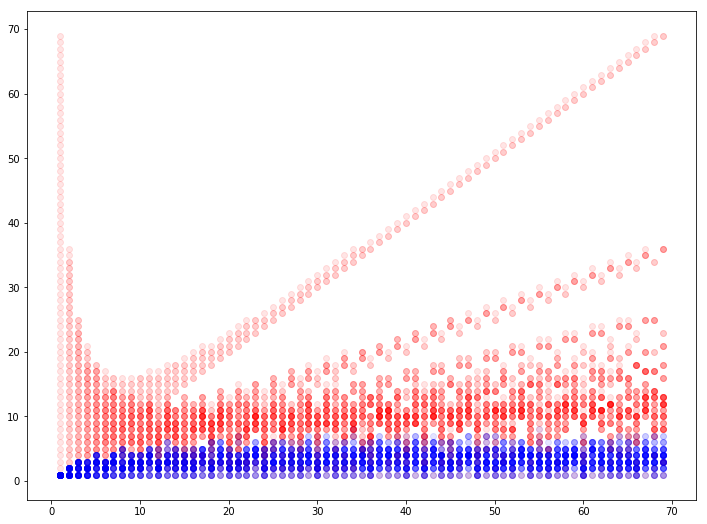

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(12, 9))

n = 70

x = list(range(1,n))
y = list(range(1,n))

for a in x:
    z1 = []
    z2 = []
    for b in y:
        z1.append(syt(a,b)[1])
        z2.append(eukl(a,b)[1])
    axs.scatter(x,z1, c = 'r', alpha = 0.1)
    axs.scatter(x,z2, c = 'b', alpha = 0.1)

plt.show()

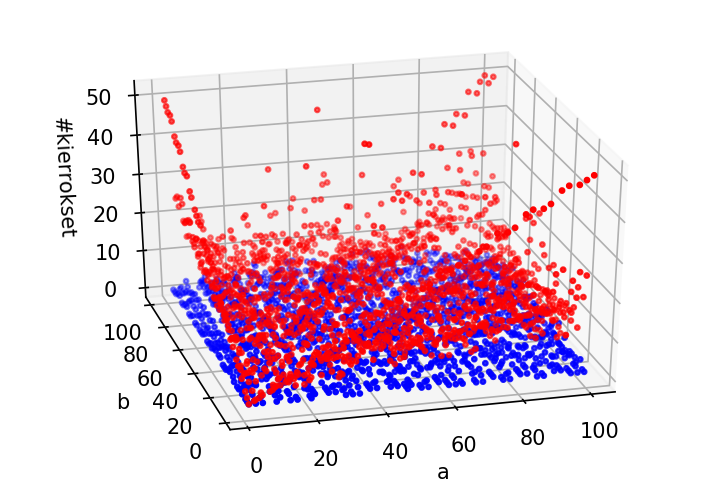

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(dpi = 150)
ax = fig.add_subplot(111, projection='3d')

points = 40
n = 100

r = np.random.randint(0, 2, points)
s = np.linspace(1,n,points)
s = np.rint(s)
s = s + r

x = []
y = []
z1 = []
z2 = []

for a in s:
    for b in s:
        x.append(a)
        y.append(b)
        z1.append(syt(a,b)[1])
        z2.append(eukl(a,b)[1])

ax.scatter(y,x,z1,c='r', marker = '.')
ax.scatter(y,x,z2, c='b', marker = '.')

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('#kierrokset')

ax.view_init(30, -105)
plt.show()

Yllä kolmiulotteinen kuvaaja. Aiempi kaksiulotteinen kuvaaja on tämä kuva sivusta katsottuna. Pisteitä on otettu harvasti ja vähän satunnaisesti, ettei kuva menisi aivan tukkoon pisteistä, ja tasavälein otetut pisteet käyttäytyvät liian säännöllisesti.

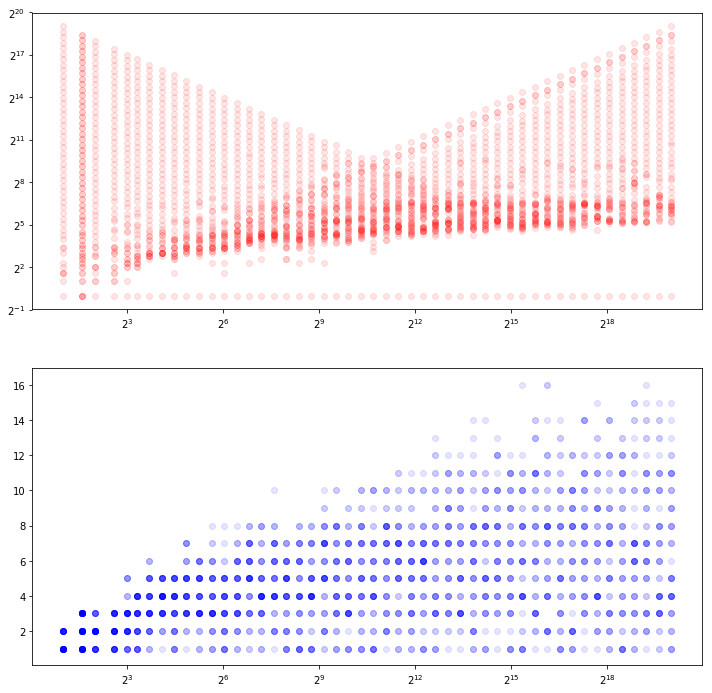

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2,figsize=(12, 12))

n = 20

x1 = np.logspace(1,n,50, base = 2)
x1 = np.rint(x1)


for a in x1:
    z1 = []
    z2 = []
    for b in x1:
        z2.append(syt(a,b)[1])
        z1.append(eukl(a,b)[1])
    axs[0].scatter(x1,z2, c = 'r', alpha = 0.1)
    axs[1].scatter(x1,z1, c = 'b', alpha = 0.1)

axs[0].loglog(basex = 2, basey = 2)
axs[1].semilogx(basex = 2)

plt.show()

Yllä vielä kuvattuna logaritmisella asteikolla molempien algoritmien kierrosten määrää. Ensimmäisessä kuvaajassa molemmat akseit ovat logaritmisia, alemmassa y- akseli on lineaarinen. Algoritmissa 1 pahimmat tapaukset tarvitsevat siis eksponentiaalisen määrän kierroksia. Siksi ei ole mitään väliä sillä, miten monta bittioperaatiota yhden kierroksen suorittaminen vie. Luvun $1$ vähentäminen luvusta $a$ on vakioaikainen operaatio, mutta algoritmi muuttuu kelvottomaksi, jos vakioaikaisia operaatioita täytyy tehdä eksponentiaalinen määrä.
Eukleideen algoritmi taas näyttää suoriutuvan lineaarisessa määrässä kierroksia kaikissa tapauksissa, ja koska jakolasku voidaan tehdä ajassa $O(n^2)$, algoritmi kuuluu luokkaan $O(n^3)$, ja siten suurimman yhteisen tekijän laskeminen kuuluu luokkaan $O(n^3)$.

# Päätelmät
Sanotaan, että ongelma on <i>ratkeava</i>, kun on olemassa algoritmi, joka ratkaisee sen polynomiajassa. Polynomiajassa toimivia algoritmeja sanotaan <i>toteutettaviksi</i>.

Voidaan todeta, että ratkaistaville ongelmille on olemassa melko yksinkertaisia ei-toteutettavia algoritmeja. Esimerkiksi voidaan testata, onko luku $a$ alkuluku kokeilemalla, jakaako mikään luku $i < \sqrt{a}$ luvun $a$. Tämä algoritmi selvästi antaa oikean vastauksen, mutta testejä pitää tehdä eksponentiaalinen määrä luvun $a$ pituuden suhteen. On kuitenkin keksitty verrattomasti hienostuneempia deterministisiä algoritmeja, jotka ratkaisevat saman ongelman polynomiajassa, tosin hitaasti, ja todennäköisyysalgoritmeja, jotka toimivat kohtuullisessa ajassa.